In [9]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

data_name = 'fix_few_shot_pipeline_3.5-turbo.csv'

INPUT_PATH = '../../Datasets/Evaluations/Sentiment Analysis/{data_name}'
INPUT_PATH = INPUT_PATH.format(data_name=data_name)
OUTPUT_PATH = '../Datasets/Evaluations/Sentiment Analysis/Eval_Output/Evaluation_{data_name}'
OUTPUT_PATH = OUTPUT_PATH.format(data_name=data_name)
PROMPT_NAME = 'prompt_3_zeroshot_single_term'
MODEL = 'gpt-3.5-turbo'

df_data = pd.read_csv(INPUT_PATH)
df_data = df_data.rename(columns={'polarity': 'y_true'})
df_data = df_data.rename(columns={'polarity_pred': 'y_pred'})




In [10]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,text_id,term_id,text,term,y_true,example1_term_id,example1_prompt,example2_term_id,example2_prompt,example3_term_id,example3_prompt,y_pred,prompt_name,prompt
0,0,0,0,0,"Amusing details distinguish desserts, from dul...",desserts,positive,0,"Input: ""The decor is not special at all but th...",3,"Input: ""when tables opened up, the manager sat...",9,"Input: ""service is good although a bit in your...",positive,prompt_single_term_fewshot,"Example 1:\nInput: ""The decor is not special a..."
1,1,1,0,1,"Amusing details distinguish desserts, from dul...",dulce de leche ice-cream,neutral,0,"Input: ""The decor is not special at all but th...",3,"Input: ""when tables opened up, the manager sat...",9,"Input: ""service is good although a bit in your...",positive,prompt_single_term_fewshot,"Example 1:\nInput: ""The decor is not special a..."
2,2,2,0,2,"Amusing details distinguish desserts, from dul...",chocolate sauce tic-tac-toe,neutral,0,"Input: ""The decor is not special at all but th...",3,"Input: ""when tables opened up, the manager sat...",9,"Input: ""service is good although a bit in your...",positive,prompt_single_term_fewshot,"Example 1:\nInput: ""The decor is not special a..."
3,3,3,0,3,"Amusing details distinguish desserts, from dul...",poached pineapple,neutral,0,"Input: ""The decor is not special at all but th...",3,"Input: ""when tables opened up, the manager sat...",9,"Input: ""service is good although a bit in your...",positive,prompt_single_term_fewshot,"Example 1:\nInput: ""The decor is not special a..."
4,4,4,1,4,The server was so busy the night we visited th...,server,negative,0,"Input: ""The decor is not special at all but th...",3,"Input: ""when tables opened up, the manager sat...",9,"Input: ""service is good although a bit in your...",negative,prompt_single_term_fewshot,"Example 1:\nInput: ""The decor is not special a..."


In [11]:
def multiclass_eval(model, prompt, df):
    y_true = df['y_true']
    y_true = df['y_pred']
    cm = metrics.confusion_matrix(df['y_true'], df['y_pred'])
    cm
    plt.figure(figsize=(3,3))
    x_axis_labels = ['negative', 'neutral', 'positive']
    y_axis_labels = ['negative', 'neutral', 'positive']
    sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cbar = 'False', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Display the plot
    plt.show()
    print(metrics.classification_report(df['y_true'], df['y_pred'], output_dict=False))
    classification_report = metrics.classification_report(df['y_true'], df['y_pred'], output_dict=True)
    df = pd.DataFrame(classification_report)
    return df
    

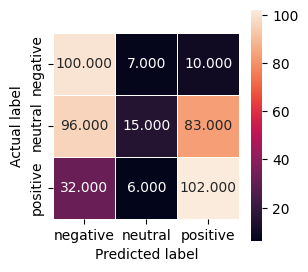

              precision    recall  f1-score   support

    negative       0.44      0.85      0.58       117
     neutral       0.54      0.08      0.14       194
    positive       0.52      0.73      0.61       140

    accuracy                           0.48       451
   macro avg       0.50      0.55      0.44       451
weighted avg       0.51      0.48      0.40       451



In [12]:
df_eval = multiclass_eval(MODEL, PROMPT_NAME, df_data)

In [5]:
df_eval.head()



,negative,neutral,positive,accuracy,macro avg,weighted avg
precision,0.616438,0.772059,0.644970,0.674058,0.677823,0.692236
recall,0.769231,0.541237,0.778571,0.674058,0.696346,0.674058
f1-score,0.684411,0.636364,0.705502,0.674058,0.675425,0.670290
support,117.000000,194.000000,140.000000,0.674058,451.000000,451.000000


In [6]:
df_eval.to_csv(OUTPUT_PATH, index=False)

OSError: Cannot save file into a non-existent directory: '../Datasets/Evaluations/Sentiment Analysis/Eval_Output'